# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

In [2]:
corr_matrix = stocks_df.corr()
corr_matrix

/var/folders/ds/v3ns8p3s2hs70n834rjn5z2r0000gn/T/ipykernel_40457/3172179329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stocks_df.corr()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
Open,1.000000,0.999905,0.999868,0.999785,-0.386222,0.089059,-0.004019,0.893675,0.895840
High,0.999905,1.000000,0.999832,0.999878,-0.384819,0.089429,-0.003897,0.893344,0.895472
Low,0.999868,0.999832,1.000000,0.999904,-0.387965,0.089989,-0.003923,0.894263,0.896452
Close,0.999785,0.999878,0.999904,1.000000,-0.386453,0.090125,-0.003862,0.893898,0.896043
Volume,-0.386222,-0.384819,-0.387965,-0.386453,1.000000,-0.039454,-0.004661,-0.555208,-0.557531
Dividends,0.089059,0.089429,0.089989,0.090125,-0.039454,1.000000,-0.001448,0.087763,0.085780
Stock Splits,-0.004019,-0.003897,-0.003923,-0.003862,-0.004661,-0.001448,1.000000,0.001501,-0.000104
Year,0.893675,0.893344,0.894263,0.893898,-0.555208,0.087763,0.001501,1.000000,0.997971
Converted Date,0.895840,0.895472,0.896452,0.896043,-0.557531,0.085780,-0.000104,0.997971,1.000000


/var/folders/ds/v3ns8p3s2hs70n834rjn5z2r0000gn/T/ipykernel_40457/2376228949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(stocks_df.corr().round(2), annot=True, cmap='vlag')


<Axes: >

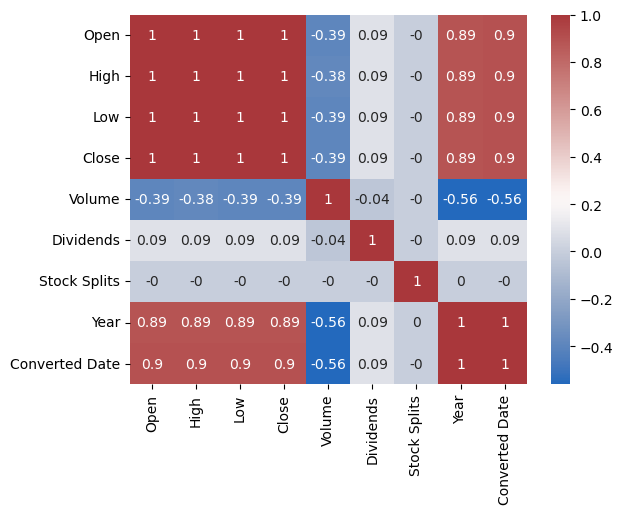

In [3]:
sb.heatmap(stocks_df.corr().round(2), annot=True, cmap='vlag')
# plt.show()

/Users/prashantsagvekar/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


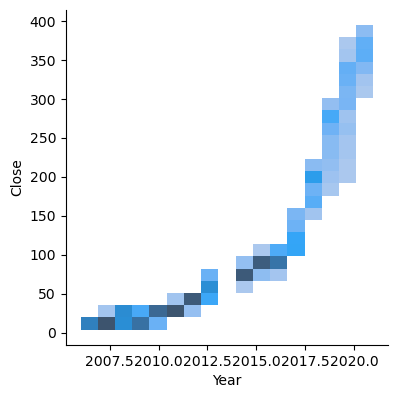

In [14]:
# sb.pairplot(stocks_df, x_vars=['Open', 'High', 'Low'],
#                 y_vars='Close', size=4,aspect=1, kind='hist')
# plt.show()
sb.pairplot(stocks_df, x_vars=['Year'],
                y_vars=['Close'], size=4,aspect=1, kind='hist')
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

Linner regression 

In [15]:
x= stocks_df['Close']
y = stocks_df['Year']

In [16]:
# Step 2 is to create your train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,
                                                            test_size = 0.3, random_state = 100)

In [17]:
X_train.head()

2457     87.028160
1540     41.846542
384      18.312334
2560     90.932243
3320    253.907516
Name: Close, dtype: float64

In [18]:
y_train.head()

2457    2016
1540    2012
384     2007
2560    2016
3320    2019
Name: Year, dtype: int64

In [19]:
X_test.head()

2424     88.322464
2643    102.939384
2501     93.349648
2044     72.125427
288      15.644708
Name: Close, dtype: float64

In [24]:
y_test.head()

2424    2016
2643    2016
2501    2016
2044    2014
288     2007
Name: Year, dtype: int64

In [20]:
# Step 3 is to build the model. Remember to import any libraries you may need
import statsmodels.api as sm

#adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fitting the regression line using 'OLS' regression function - model now lives in the variable 'lr'
lr = sm.OLS(y_train, X_train_sm).fit()

#printing the parameters
lr.params

const    2009.656652
Close       0.037334
dtype: float64

/var/folders/ds/v3ns8p3s2hs70n834rjn5z2r0000gn/T/ipykernel_40457/4195554969.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(res, bins = 15)


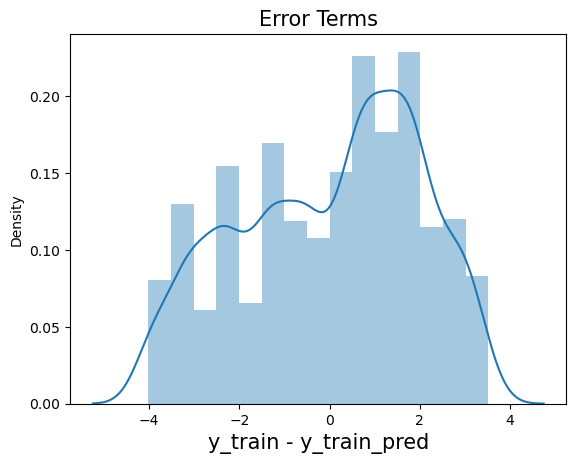

In [21]:
# Step 4 is to perform residual analysis

#Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

#plot data
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

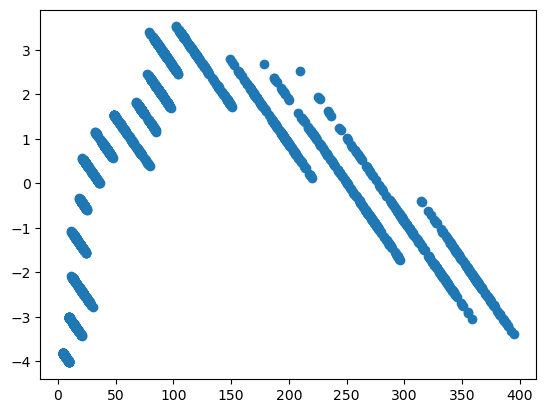

In [22]:
plt.scatter(X_train, res)
plt.show()


Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

Now plot the residuals. Did you get a bell curve?

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 